In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as ly
import seaborn as sns

pd.set_option('display.max_columns', None)


import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

C:\Users\shrey\AppData\Local\Temp\ipykernel_11372\2991980891.py:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\shrey\AppData\Local\Temp\ipykernel_11372\2991980891.py:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.probability import FreqDist


In [4]:
dataset = pd.read_csv("IMDB Top 250 Movies.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [5]:
dataset.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [6]:
dataset1 = pd.read_excel('dataset.xlsx')
dataset1.head()


,Unnamed: 0,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


Finding Missing Values

In [7]:
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

#loop where feature in feature_with_na is printed
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4), '% missing values')

features_with_na

[]

Converting Values

This shows that there are no missing values in the dataset.

In [8]:
import statistics

In [9]:
def summary_stat(data):
    summary = {
        'mean': statistics.mean(data),
        'median': statistics.median(data),
        'mode': statistics.mode(data),
        'variance': statistics.variance(data),
        'standard_deviation': statistics.stdev(data),
    }
    return summary 


In [10]:
#summary statistics of different column

#1: rank

summary_stat(dataset['rank'])


{'mean': 125.5,
 'median': 125.5,
 'mode': 1,
 'variance': 5229.166666666667,
 'standard_deviation': 72.31297716638879}

In [11]:
#2 rating

summary_stat(dataset['rating'])

{'mean': 8.3072,
 'median': 8.2,
 'mode': 8.1,
 'variance': 0.052478072289156706,
 'standard_deviation': 0.22908092956236387}

replacing the $sign

In [12]:
dataset['budget'] = dataset['budget'].str.replace('$', '')
dataset['budget'] = dataset['budget'].str.replace('RF', '')
dataset['budget'] = dataset['budget'].str.replace('Not Available','0')
dataset['budget'] = dataset['budget'].str.replace('EM','')
dataset['budget'] = dataset['budget'].str.strip()

In [13]:
#converting to numeric

dataset['budget']= pd.to_numeric(dataset['budget'])

In [14]:
#budget
summary_stat(dataset['budget'])

{'mean': 44257872.636,
 'median': 9750000.0,
 'mode': 0,
 'variance': 2.6454336797663536e+16,
 'standard_deviation': 162647892.0787587}

converting box office to numerical

In [15]:
dataset['box_office'] = dataset['box_office'].str.replace('Not Available','0')
dataset['box_office'] = dataset['box_office'].str.replace('(estimated)','')



dataset['box_office'] = dataset['box_office'].str.strip()

In [16]:
dataset['box_office'] = pd.to_numeric(dataset['box_office'])

In [17]:
#box office
summary_stat(dataset['box_office'])

{'mean': 206773997.136,
 'median': 46039729.0,
 'mode': 0,
 'variance': 1.3346569961356155e+17,
 'standard_deviation': 365329576.70240927}

to do runtime I need to make an entire function that parses time and records h and m as hours and minutes instead of strings

In [18]:
#runtime

#ummary_stat(dataset1['run_time'])


to analyse the distribution of genres, we use nltk. first we need to tokenize it.

In [19]:
token = [word_tokenize(genre) for genre in dataset['genre']]
# Flatten the list of tokens
genres_flat = [genre for sublist in token for genre in sublist]

#frequence

genre_freq = FreqDist(genres_flat)

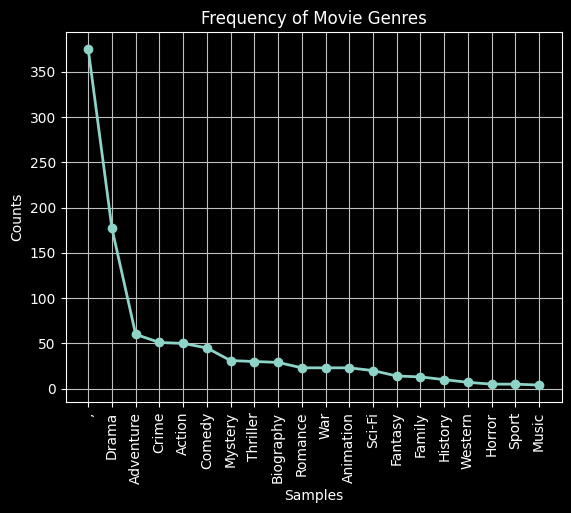

In [20]:

ax = genre_freq.plot(20, cumulative=False, title = 'Frequency of Movie Genres', marker = 'o')


In [21]:
dataset.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


Analysing Trends in Years
so we will count first

<Axes: xlabel='year', ylabel='rating'>

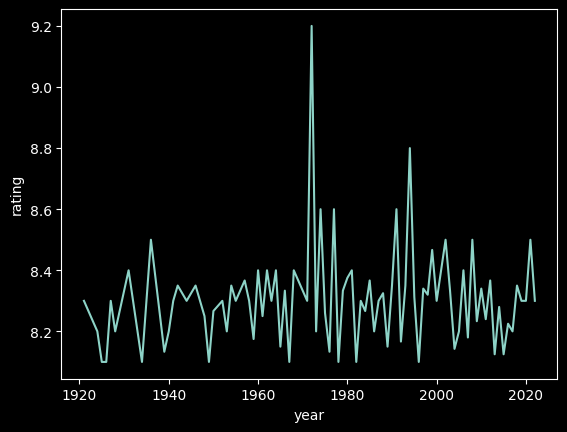

In [22]:
grouped_by_year = dataset.groupby('year')
#grouping the dataset by year so that all the movies released that year put together.

movie_count_by_year = grouped_by_year.size()
#how many movies each year

average_rating_by_year = grouped_by_year['rating'].mean()
#mean rating every year

sns.lineplot(average_rating_by_year)


Explore the relationship between ratings and budget.

In [23]:
corr_budget_rating = np.corrcoef(dataset['budget'], dataset['rating'])
corr_budget_rating

array([[1.        , 0.07311466],
       [0.07311466, 1.        ]])

weak positive Correlation between Budget and Ratings

<Axes: xlabel='budget', ylabel='rating'>

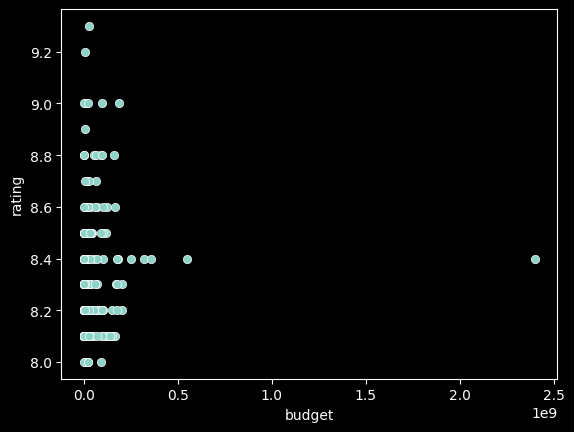

In [24]:
sns.scatterplot(data = dataset, x = 'budget', y = 'rating')

PLOTLY VISUALIZATION


In [25]:
help(ly)

Help on package plotly.express in plotly:

NAME
    plotly.express

DESCRIPTION
    `plotly.express` is a terse, consistent, high-level wrapper around `plotly.graph_objects`
    for rapid data exploration and figure generation. Learn more at https://plotly.com/python/plotly-express/

PACKAGE CONTENTS
    _chart_types
    _core
    _doc
    _imshow
    _special_inputs
    colors (package)
    data (package)
    imshow_utils
    trendline_functions (package)

CLASSES
    builtins.object
        plotly.express._special_inputs.Constant
        plotly.express._special_inputs.IdentityMap
        plotly.express._special_inputs.Range

    class Constant(builtins.object)
     |  Constant(value, label=None)
     |
     |  Objects of this class can be passed to Plotly Express functions that expect column
     |  identifiers or list-like objects to indicate that this attribute should take on a
     |  constant value. An optional label can be provided.
     |
     |  Methods defined here:
     |
  

In [26]:
dataset.to_excel('dataset.xlsx')

In [27]:
dataset1.head()

,Unnamed: 0,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


(1.0, 8.0)

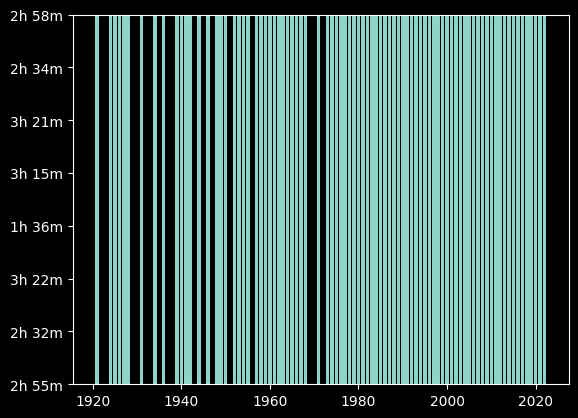

In [28]:
plt.bar(dataset1['year'], dataset1['run_time'])
plt.ylim(1, 8)




In [29]:
# token1 = [word_tokenize(cast) for genre in dataset['casts']]
# # Flatten the list of tokens
# genres_flat2 = [casts for sublist in token1 for casts in sublist]

# #frequence

# genre_freq = FreqDist(genres_flat2)

# Tokenize the 'casts' column
token1 = [word_tokenize(cast) for cast in dataset['casts']]
# Flatten the list of tokens
casts_flat = [casts for sublist in token1 for casts in sublist]

# Calculate frequency distribution
cast_freq = FreqDist(casts_flat)

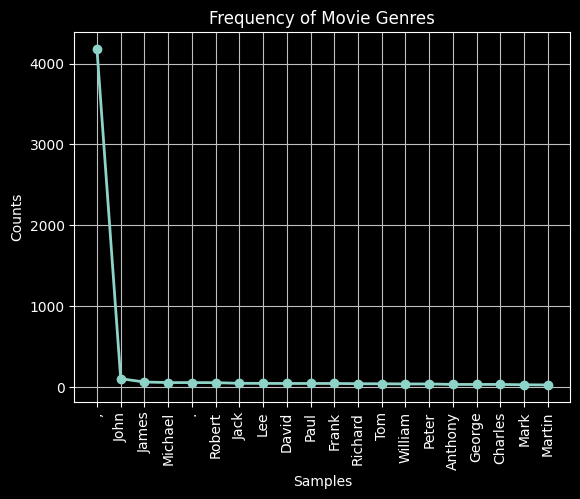

In [30]:
ax1 = cast_freq.plot(20, cumulative=False, title = 'Frequency of Movie Genres', marker = 'o')

In [31]:
import hvplot.pandas